**Sentiment analysis using ktrain library - Standard Method**

This notebook intends to build a classification model to predict sentiment analysis using ktrain library.

**Problem Description**

Sentiment analysis is a technique to predict the sentiment according with text classification. In this problem, we consider movies reviews from IMDB website. The reviews are classified as negative and positive.

**Dataset Description**

The dataset is loaded from  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz. 

**-Overview**

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

**-Dataset** 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg).

**Ktrain Library**

Ktrain Library proposes many Neural Network models. Some problem applications which are covered in this library are image classification, text classification, classification model, etc. This library is an easy way to apply these models without many line codes. For more details [see](https://pypi.org/project/ktrain/).

# Importing Libraries

In [1]:
import os.path
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text # objecto to make text classification

# Data preprocessing

## Loading the IMDB dataset review

The first step to build the model, is to load the dataset from https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [2]:
dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz",
                                  origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                  extract=True) # To download and extract the files
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), 'aclImdb') # to indicate the directory

## Creating the training and test variables

When we create the training and test variables with the object text, we don’t need to take care about the text cleaning (tokenization, stemmer and others actions), this is made by this object with the aid of the preproc object (this is a transformer object). The argument max_features is the number of input words, maxlen is the number of words which will be considered to train and test the model. The parameter preprocess_mode choose which method we want to use, for example BERT or NBSVC. Classes indicates the classes in the problem.

In [3]:
(x_train, y_train), (x_test, y_test), preproc= text.texts_from_folder(IMDB_DATADIR, 
                                           max_features=80000, maxlen=2000, 
                                           ngram_range=3, 
                                           preprocess_mode='standard',
                                           classes=['pos', 'neg'])

detected encoding: utf-8
language: en
Word Counts: 88582
Nrows: 25000
25000 train sequences
train sequence lengths:
	mean : 237
	95percentile : 608
	99percentile : 923
Adding 3-gram features
max_features changed to 5151281 with addition of ngrams
Average train sequence length with ngrams: 709
train (w/ngrams) sequence lengths:
	mean : 709
	95percentile : 1821
	99percentile : 2766
x_train shape: (25000,2000)
y_train shape: (25000, 2)
Is Multi-Label? False
25000 test sequences
test sequence lengths:
	mean : 230
	95percentile : 584
	99percentile : 900
Average test sequence length with ngrams: 523
test (w/ngrams) sequence lengths:
	mean : 524
	95percentile : 1295
	99percentile : 1971
x_test shape: (25000,2000)
y_test shape: (25000, 2)


# Building the model

The Ktrain library uses the TensorFlow. Here, we do not need to declare any function from the TensorFlow,  the library makes this for us.

## Inititialzing the model

To initiate the model, we consider the attribute text_classifier, NVSVM is the method to classifier. This method is composed by Naive Bayes and Support Vector Machine. This method is well know from Keras library.

In [4]:
# load an NBSVM model
model = text.text_classifier('nbsvm', (x_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 2000
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-25000
computing log-count ratios...
done.


## Training the model

To train the model there are some steps to follow. First we create the object learner, after we consider some attributes as lr_find to find the learn rate, lr_plot to verify the evolution of the learn rate, finally we fit the model with the attribute fit.

In [5]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test)) # object to learn

In [6]:
learner.lr_find() # Finding the best learning rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
782/782 [==============================] - 36s 45ms/step - loss: 0.6885 - accuracy: 0.5531
Epoch 2/1024
782/782 [==============================] - 33s 42ms/step - loss: 0.3309 - accuracy: 0.9513
Epoch 3/1024
782/782 [==============================] - 0s 105us/step - loss: 4.2029 - accuracy: 0.9165


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


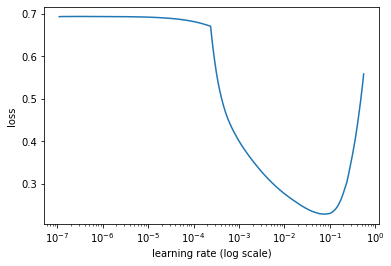

In [7]:
learner.lr_plot() # Visualizing the learn rate evolution by loss function

As seen from the graphic, the learning rate with the minimal loss is around $0.001$.

To fit the model the library considers the SGDR learning rate schedule.

In [8]:
learner.fit(0.001, 3, cycle_len=1, cycle_mult=2) # Fitting the model

Epoch 1/7
782/782 [==============================] - 34s 43ms/step - loss: 0.2092 - accuracy: 0.9471 - val_loss: 0.2474 - val_accuracy: 0.9191
Epoch 2/7
782/782 [==============================] - 32s 41ms/step - loss: 0.0455 - accuracy: 0.9937 - val_loss: 0.2243 - val_accuracy: 0.9232
Epoch 3/7
782/782 [==============================] - 33s 42ms/step - loss: 0.0082 - accuracy: 0.9998 - val_loss: 0.2228 - val_accuracy: 0.9234
Epoch 4/7
782/782 [==============================] - 33s 42ms/step - loss: 0.0069 - accuracy: 0.9999 - val_loss: 0.2164 - val_accuracy: 0.9226
Epoch 5/7
782/782 [==============================] - 33s 42ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2144 - val_accuracy: 0.9229
Epoch 6/7
782/782 [==============================] - 31s 40ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2136 - val_accuracy: 0.9230
Epoch 7/7
782/782 [==============================] - 31s 39ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2135 - val_accuracy: 0.9230

The final validation accuracy is $92.30\%$.

## Making predictions

To make predictions we must to create the object predictor with ktrain.get_predictor. The input parameters are learn.model and preproc, the last parameters is very important, it makes the text preprocessing.

In [9]:
predictor = ktrain.get_predictor(learner.model, preproc) # creating the object

In [10]:
data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
         'The film really sucked. I want my money back.',
        'What a beautiful romantic comedy. 10/10 would see again!'] # List with some test reviews.

In [11]:
predictor.get_classes() # To verify the classes

['neg', 'pos']

In [12]:
predictor.predict(data)

['neg', 'neg', 'pos']

The predictions can be considered to be correct.

If you want to see the prabability, the parameter return_proba=True allow us to obtain it.

In [13]:
predictor.predict(data, return_proba=True)

array([[0.8964736 , 0.10352644],
       [0.8151427 , 0.18485735],
       [0.23758188, 0.76241815]], dtype=float32)

## Saving the model

The model can be saved to the disk. In case of necessity, the model can be reloaded. This is very practical to make applications.

In [14]:
predictor.save('/tmp/my_moviereview_predictor') # saving the model

In [15]:
predictor_save = ktrain.load_predictor('/tmp/my_moviereview_predictor') # creating the object to load the saved model

In [16]:
predictor_save.predict(['Groundhog Day is my favorite movie of all time!']) # Making a prediction with the loaded model.

['pos']

### Others models

If you want to try others models, the library offers a list with all available methods.

In [17]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


# Conclusion

We presented a simple example to demonstrate how to apply some functions of ktrain library to make text classification. The results from the sentiment analysis are satisfactory, with a validation accuracy of $92.30\%$ using just $7$ epochs. The library offers facility to build the models with some lines and good score results. Keep in mind, is always recommended to know the libraries of base as TensorFlow and Keras, because this library is built with they.